<h1 style='color:black;font-size:30px;text-align:center'>Prewitt Edge Detection</h1>

Prewitt has proposed the Prewitt edge detection technique in 1970. It is a right algorithm to measure the magnitude and orientation of the edges. This technique evaluates the edge directions directly with the maximum response from the mask. It is having 8 directions. But, sometimes most direct directions approximation are not much perfect. This Prewitt operator is just like a Sobel operator and easy to implement than Sobel operator but it produces some times noisier results. The Prewitt edge detector is less vulnerable to noise because it differentiates in one direction and make average in another direction.The pair of 3x3 convolution masks for 8 directions are illustrated in
the below figure. One mask is just to other rotated by 90 degrees. 




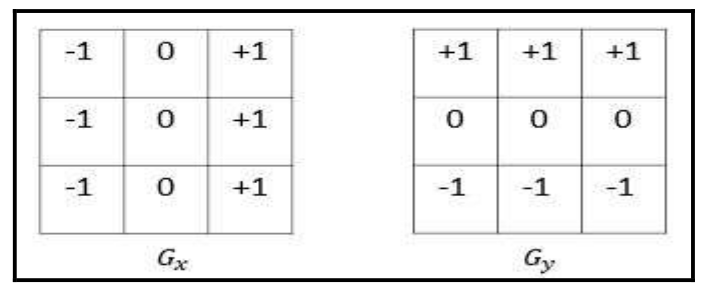

The orgnization of pixels about the central pixel is as follow



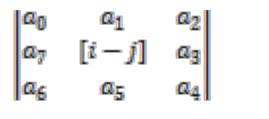

The partial derivates of perwitt operator are measured as:
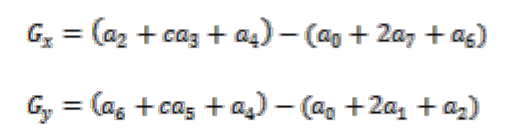


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def convolution2d(image):
   kernel_x=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
   kernel_y=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
   m, n = kernel_x.shape
   x, y = image.shape
   if m==n:
      x = x - m + 1
      y = y - n + 1
      new_image = np.zeros((x,y))
      for i in range(x):
          for j in range(y):
               edge_x= np.sum((image[i:i+m, j:j+n]*kernel_x))
               edge_y= np.sum((image[i:i+m, j:j+n]*kernel_y))
               new_image[i][j]=np.sqrt((np.square(edge_x)+np.square(edge_y)))
#                new_image[i][j]=(np.abs(edge_x)+np.abs(edge_y))
   return new_image

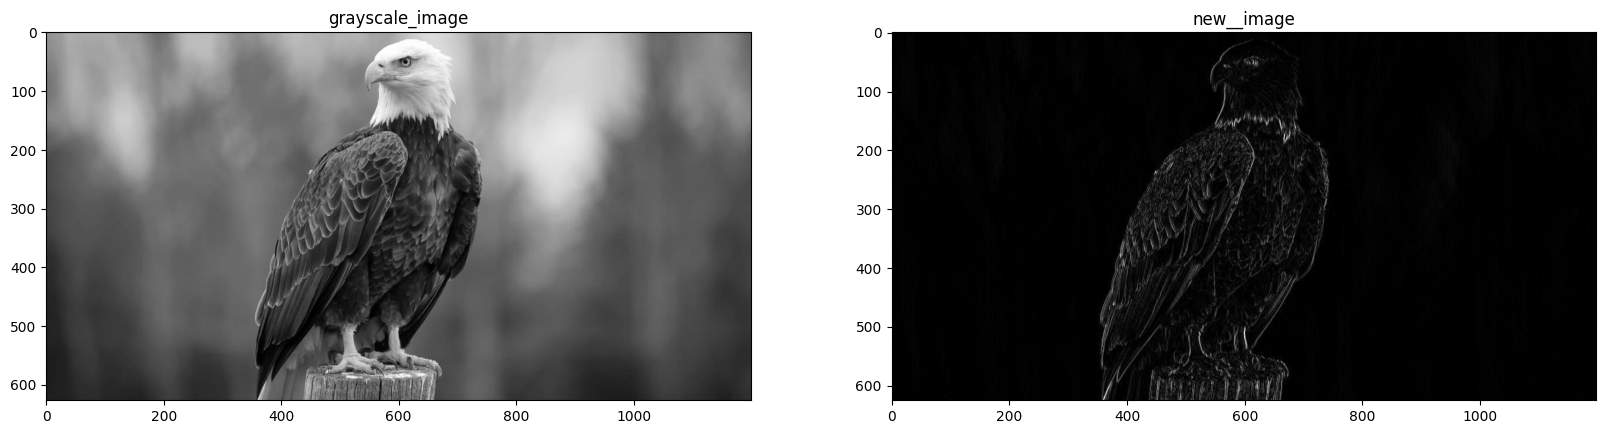

In [8]:
original_image=cv2.imread('eagle.jpg')
grayscale_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
image=cv2.resize(grayscale_image,(1200,1200))
new_image=convolution2d(grayscale_image)
images=[grayscale_image,new_image]
titles=['grayscale_image','new__image']
plt.figure(figsize=(20,30))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
plt.show()